In [1]:
import h5py
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import spectrogram

In [2]:
#import h5py

# Open the v7.3+ .mat file using h5py

# This opens the .mat file (which is an HDF5 file under the hood) in read mode ('r').
# The with statement ensures the file is properly closed after use, even if an error occurs
with h5py.File(r'C:\Users\congy\Desktop\Gritton_Lab\Katamine_Data\622\downsampled_LFP.mat', 'r') as f:
    # Print all top-level keys (variable names)
    print(list(f.keys()))
    print(f['data_combine_Low_downsample'].shape)
    print(f['data_combine_Low_downsample'][:, 0:1].shape)

['data_combine_Low_downsample']
(4968346, 32)
(4968346, 1)


In [3]:
# from scipy.io import loadmat

# Load .mat file saved in MATLAB v7.2 or earlier format
data = loadmat(r'C:\Users\congy\Desktop\Gritton_Lab\Katamine_Data\622\trial_info.mat')

# See all variable names in the .mat file
print(data.keys())
print(data['trialinfo'].shape)      # awake & anesthetize
print(data['trialinfo'].dtype.names)

dict_keys(['__header__', '__version__', '__globals__', 'trialinfo'])
(1, 2)
('TSClean', 'TSMasked')


In [4]:
print(data['trialinfo'][0, 0].dtype.names)
print(data['trialinfo'][0, 0]['TSClean'].shape)
print(data['trialinfo'][0, 1].dtype.names)
print(data['trialinfo'][0, 1]['TSClean'].shape)
print(data['trialinfo'][0, 0].dtype.names)
print(data['trialinfo'][0, 0]['TSMasked'].shape)

('TSClean', 'TSMasked')
(4, 2)
('TSClean', 'TSMasked')
(4, 2)
('TSClean', 'TSMasked')
(4, 4, 2)


In [5]:
print(data['trialinfo'][0, 0]['TSClean'])

[[array([[ 142.03301215],
         [ 287.032938  ],
         [ 477.03284073],
         [ 627.03276372],
         [ 972.03258729],
         [1162.03249002],
         [1217.03246164],
         [1412.03236198],
         [1642.03224421],
         [1812.03215718]]) array([[ 102.03303266],
                                  [ 357.032902  ],
                                  [ 442.03285861],
                                  [ 767.03269219],
                                  [ 922.0326128 ],
                                  [1077.03253341],
                                  [1212.03246427],
                                  [1422.03235674],
                                  [1787.03216982],
                                  [1857.03213406]])]
 [array([[ 157.03300452],
         [ 282.03294039],
         [ 582.03278685],
         [ 802.03267431],
         [ 882.0326333 ],
         [1092.03252578],
         [1257.03244138],
         [1552.03229022],
         [1682.0322237 ],
         [1922.03210

In [6]:
print(data['trialinfo'][0, 1]['TSClean'])

[[array([[2180.16972645],
         [2325.16965207],
         [2515.16955479],
         [2665.16947802],
         [3010.16930135],
         [3200.16920408],
         [3255.16917594],
         [3450.16907605],
         [3680.16895851],
         [3850.16887124]]) array([[2140.16974696],
                                  [2395.1696163 ],
                                  [2480.16957291],
                                  [2805.16940649],
                                  [2960.1693271 ],
                                  [3115.16924771],
                                  [3250.16917857],
                                  [3460.16907104],
                                  [3825.16888412],
                                  [3895.16884836]])]
 [array([[2195.16971882],
         [2320.16965469],
         [2620.16950115],
         [2840.16938837],
         [2920.1693476 ],
         [3130.16924008],
         [3295.16915544],
         [3590.16900452],
         [3720.168938  ],
         [3960.16881

In [7]:
Clean_array_00_0idx = np.concatenate([data['trialinfo'][0, 0]['TSClean'][0][0],
               data['trialinfo'][0, 0]['TSClean'][1][0],
               data['trialinfo'][0, 0]['TSClean'][2][0],
               data['trialinfo'][0, 0]['TSClean'][3][0]])
print(Clean_array_00_0idx)

Clean_array_00_1idx = np.concatenate([data['trialinfo'][0, 0]['TSClean'][0][1],
               data['trialinfo'][0, 0]['TSClean'][1][1],
               data['trialinfo'][0, 0]['TSClean'][2][1],
               data['trialinfo'][0, 0]['TSClean'][3][1]])
print('\n', Clean_array_00_1idx)

Clean_array_01_0idx = np.concatenate([data['trialinfo'][0, 1]['TSClean'][0][0],
               data['trialinfo'][0, 1]['TSClean'][1][0],
               data['trialinfo'][0, 1]['TSClean'][2][0],
               data['trialinfo'][0, 1]['TSClean'][3][0]])

print('\n', Clean_array_01_0idx)

Clean_array_01_1idx = np.concatenate([data['trialinfo'][0, 1]['TSClean'][0][1],
               data['trialinfo'][0, 1]['TSClean'][1][1],
               data['trialinfo'][0, 1]['TSClean'][2][1],
               data['trialinfo'][0, 1]['TSClean'][3][1]])

print('\n', Clean_array_01_1idx)

[[ 142.03301215]
 [ 287.032938  ]
 [ 477.03284073]
 [ 627.03276372]
 [ 972.03258729]
 [1162.03249002]
 [1217.03246164]
 [1412.03236198]
 [1642.03224421]
 [1812.03215718]
 [ 157.03300452]
 [ 282.03294039]
 [ 582.03278685]
 [ 802.03267431]
 [ 882.0326333 ]
 [1092.03252578]
 [1257.03244138]
 [1552.03229022]
 [1682.0322237 ]
 [1922.03210068]
 [  37.0330658 ]
 [ 367.032897  ]
 [ 532.03281236]
 [ 607.03277397]
 [ 857.03264618]
 [1172.03248477]
 [1367.03238487]
 [1492.03232098]
 [1772.03217769]
 [1987.03206754]
 [ 162.0330019 ]
 [ 372.03289437]
 [ 517.03282022]
 [ 752.03269982]
 [ 887.03263068]
 [1132.03250527]
 [1207.03246689]
 [1482.03232598]
 [1767.03218007]
 [1957.0320828 ]]

 [[ 102.03303266]
 [ 357.032902  ]
 [ 442.03285861]
 [ 767.03269219]
 [ 922.0326128 ]
 [1077.03253341]
 [1212.03246427]
 [1422.03235674]
 [1787.03216982]
 [1857.03213406]
 [  17.03307605]
 [ 257.03295326]
 [ 572.03279209]
 [ 747.03270245]
 [ 862.03264356]
 [1192.03247452]
 [1372.03238249]
 [1537.03229785]
 [1777.0321

In [9]:
## Trial to snip segments on the signal of channel 1

with h5py.File(r'C:\Users\congy\Desktop\Gritton_Lab\Katamine_Data\622\downsampled_LFP.mat', 'r') as f:
    fs = 24414.0625 / 20  # 1220.703125 Hz

    print(Clean_array_00_0idx)
    print(Clean_array_00_0idx.shape)
    
    print(int(Clean_array_00_0idx[0]))
    
    print(type(Clean_array_00_0idx[0]))
    
    trans_Clean_array_00_0idx = Clean_array_00_0idx.T
    print(trans_Clean_array_00_0idx)
    print(trans_Clean_array_00_0idx.shape)
    print(trans_Clean_array_00_0idx[0])
    print(trans_Clean_array_00_0idx[0].shape)

    # This loads the entire dataset into memory in one call.
    data = f['data_combine_Low_downsample'][:, 0:1]
    indices = [(int((arr.item()-1)*fs), int((arr.item()+4)*fs)) for arr in trans_Clean_array_00_0idx[0]]
    lst = [data[start: stop] for (start, stop) in indices]
    
    
    print(type(lst[0]))
    print(len(lst[0]))
    print(len(lst[1]))
    print(len(lst[2]))
    print(len(lst[3]))
    print(lst[0].shape)
    
    
    min_length = min(arr.shape[0] for arr in lst)
    
    trimmed_lst = [arr[:min_length] for arr in lst]
    summed_signal = np.sum(trimmed_lst, axis=0)
    mean_signal = summed_signal/40
    print(lst)
    print('lst length '+ str(len(lst)))
    
    print(len(lst[0]))
    print(mean_signal)
    print(mean_signal.shape)
    
    
    trans_Clean_array_01_0idx = Clean_array_01_0idx.T
    
    indices_2 = [(int((arr.item()-1)*fs), int((arr.item()+4)*fs)) for arr in trans_Clean_array_01_0idx[0]]
    lst_2 = [data[start: stop] for (start, stop) in indices_2]
    

    
    
    min_length_2 = min(arr.shape[0] for arr in lst_2)
    
    trimmed_lst_2 = [arr[:min_length] for arr in lst_2]
    summed_signal_2 = np.sum(trimmed_lst_2, axis=0)
    mean_signal_2 = summed_signal_2/40


    

[[ 142.03301215]
 [ 287.032938  ]
 [ 477.03284073]
 [ 627.03276372]
 [ 972.03258729]
 [1162.03249002]
 [1217.03246164]
 [1412.03236198]
 [1642.03224421]
 [1812.03215718]
 [ 157.03300452]
 [ 282.03294039]
 [ 582.03278685]
 [ 802.03267431]
 [ 882.0326333 ]
 [1092.03252578]
 [1257.03244138]
 [1552.03229022]
 [1682.0322237 ]
 [1922.03210068]
 [  37.0330658 ]
 [ 367.032897  ]
 [ 532.03281236]
 [ 607.03277397]
 [ 857.03264618]
 [1172.03248477]
 [1367.03238487]
 [1492.03232098]
 [1772.03217769]
 [1987.03206754]
 [ 162.0330019 ]
 [ 372.03289437]
 [ 517.03282022]
 [ 752.03269982]
 [ 887.03263068]
 [1132.03250527]
 [1207.03246689]
 [1482.03232598]
 [1767.03218007]
 [1957.0320828 ]]
(40, 1)
142
<class 'numpy.ndarray'>
[[ 142.03301215  287.032938    477.03284073  627.03276372  972.03258729
  1162.03249002 1217.03246164 1412.03236198 1642.03224421 1812.03215718
   157.03300452  282.03294039  582.03278685  802.03267431  882.0326333
  1092.03252578 1257.03244138 1552.03229022 1682.0322237  1922.03210

[0.0000000e+00 8.1920000e-04 1.6384000e-03 ... 4.9971200e+00 4.9979392e+00
 4.9987584e+00]
<class 'numpy.ndarray'>
(6103, 1)
<class 'numpy.ndarray'>
(6103,)


<Figure size 1500x300 with 0 Axes>

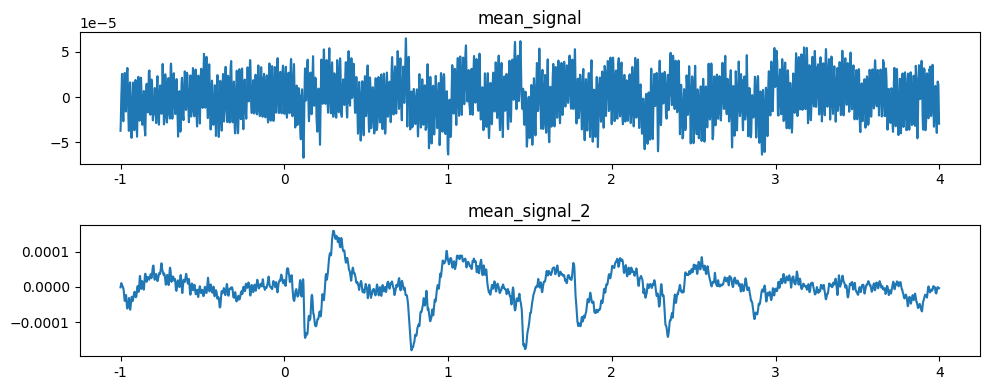

In [9]:
# import matplotlib.pyplot as plt 

plt.figure(figsize=(15, 3)) 

fs = 24414.0625 / 20  # 1220.703125 Hz



duration = 5 
samples = int(duration * fs)

time_axis = np.arange(samples) / fs  


print(time_axis)
print(type(time_axis))
print(mean_signal.shape)
print(type(mean_signal))
print(mean_signal.flatten().shape)

# Create 1 row, 2 columns of subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 4))

# Plot in first subplot   awake state
axes[0].plot(time_axis, mean_signal)
axes[0].set_title('mean_signal')

axes[0].set_xticks(np.linspace(0, 5, 6)) 
axes[0].set_xticklabels(['-1', '0', '1', '2', '3', '4'])

# Plot in second subplot      anethetized
axes[1].plot(time_axis, mean_signal_2)
axes[1].set_title('mean_signal_2')

axes[1].set_xticks(np.linspace(0, 5, 6)) 
axes[1].set_xticklabels(['-1', '0', '1', '2', '3', '4'])

# labels = ['-1', '0', '1', '2', '3', '4'] 
# ticks = np.linspace(0, 5, 6)
#plt.xticks(ticks, labels)
plt.tight_layout()
plt.show()


### Awake mice show a desynchronized LFP with a broad range of frequencies, including:

# Theta (6–12 Hz): often seen during exploration and movement

# Gamma (30–80 Hz): associated with sensory processing and cognition

### Anesthetized mice show strong low-frequency synchronization, dominated by:

# Delta (0.5–4 Hz) and slow oscillations (<1 Hz)

# Reduced high-frequency activity

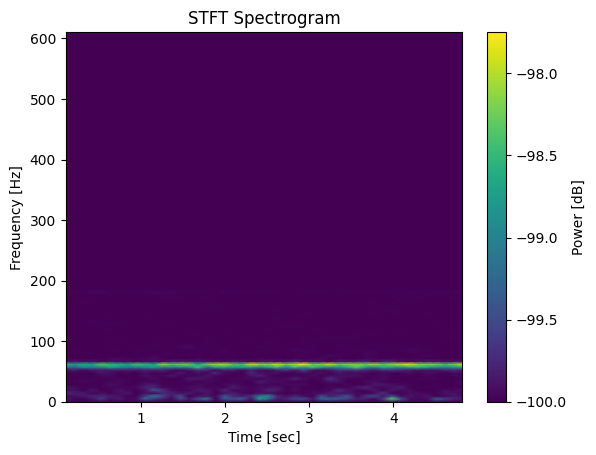

In [139]:
# from scipy.signal import spectrogram

f, t, Sxx = spectrogram(mean_signal.flatten(), fs=1220.7, nperseg=256, noverlap=128)
plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('STFT Spectrogram')
plt.colorbar(label='Power [dB]')
plt.show()

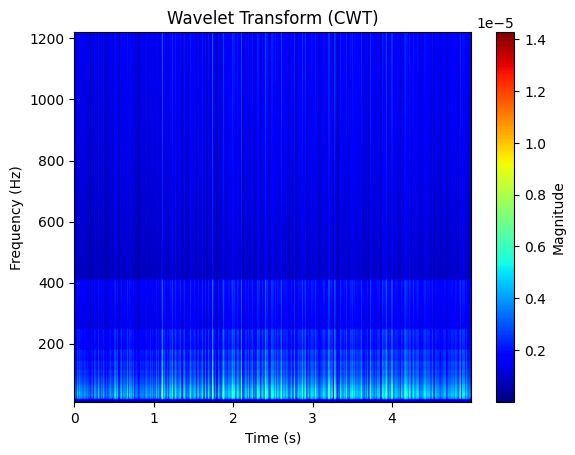

In [149]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Choose a wavelet (e.g., Morlet) and scales
wavelet = 'cmor'
scales = np.arange(1, 128)

#print(scales.reshape(-1, 1))
#print(mean_signal.shape)
# Apply CWT

wavelet = 'cmor1.5-1.0' 
coeffs, freqs = pywt.cwt(mean_signal, scales.reshape(-1, 1), wavelet, sampling_period=1/fs)

plt.imshow(np.abs(coeffs), extent=[0, len(mean_signal)/fs, freqs.min(), freqs.max()], cmap='jet', aspect='auto', origin='lower')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Wavelet Transform (CWT)')
plt.colorbar(label='Magnitude')
plt.show()

In [150]:
import numpy as np
from scipy.signal import coherence
import matplotlib.pyplot as plt


# x and y should be 1D NumPy arrays from two channels, same length
x = signal[:, 0].flatten()  # e.g., channel 1
y = signal[:, 1].flatten()  # e.g., channel 2
fs = 1220.7  # your sampling frequency in Hz


f, Cxy = coherence(x, y, fs=fs, nperseg=1024)


In [11]:
## Trial to snip segments on the signal of all channels 

with h5py.File(r'C:\Users\congy\Desktop\Gritton_Lab\Katamine_Data\622\downsampled_LFP.mat', 'r') as f:
    fs = 24414.0625 / 20  # 1220.703125 Hz

    # This loads the entire dataset into memory in one call.
    data = f['data_combine_Low_downsample']
    

    
    ch_dict = {}  # dict with key of 32 channels and the corresponding segments on the signal
   
    trans_Clean_array_00_1idx = Clean_array_00_1idx.T
    print(data.shape[1])
    print(trans_Clean_array_00_0idx.shape)
    for ch in range(data.shape[1]):
        channel_data = data[:, ch]
        indices = [(int((int(arr)-1)*fs), int((int(arr)+4)*fs)) for arr in trans_Clean_array_01_0idx[0]]
        lst = [channel_data[start: stop] for (start, stop) in indices]
        ch_dict[ch+1] = lst
        

    print(ch_dict.keys())
    print(len(ch_dict[1][0]))

32
(1, 40)
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])
6103


6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103
6103


(0.0, 5.0)

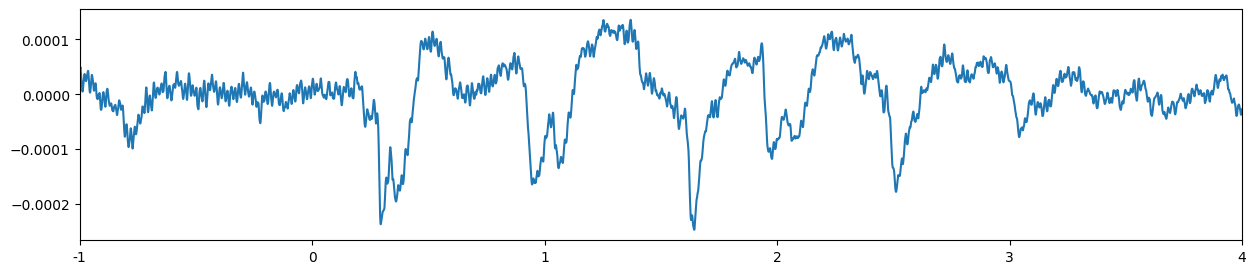

In [12]:
grand_signal = None
grand_mean_signal =None


for ch_num in ch_dict.keys():   
    
    min_length = min(arr.shape[0] for arr in ch_dict[ch_num])
    print(min_length)
    
    trimmed_lst = [arr[:min_length] for arr in ch_dict[ch_num]]
    summed_signal = np.sum(trimmed_lst, axis=0)
    mean_signal = summed_signal/40

    if grand_signal is None:
        grand_signal = np.zeros_like(mean_signal)
    grand_signal += mean_signal

if grand_mean_signal is None:
    grand_mean_signal = grand_signal/32    


plt.figure(figsize=(15, 3)) 

fs = 24414.0625 / 20  # 1220.703125 Hz



duration = 5 
samples = int(duration * fs)

time_axis = np.arange(samples) / fs  
    
    
    
plt.plot(time_axis, grand_mean_signal)
labels = ['-1', '0', '1', '2', '3', '4'] 
ticks = np.linspace(0, 5, 6)
plt.xticks(ticks, labels)
plt.xlim(0, 5)


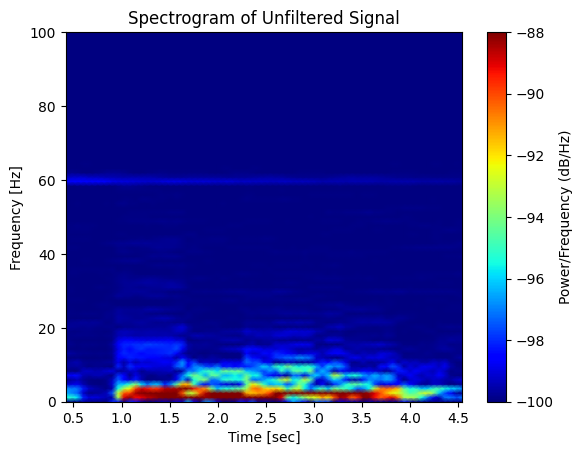

In [69]:
### 
f, t_spec, Sxx = spectrogram(grand_mean_signal, fs, nperseg=1024, noverlap=950)




# Plot spectrogram
plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx + 1e-10), cmap='jet', shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 100)
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Unfiltered Signal')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.clim(-100, -88)
plt.show()
